$\textbf{PROGRAMMING ASSIGNMENT}$
---
Instructions:
1. Choose a unique dataset from: https://archive.ics.uci.edu
2. Your dataset should be unique from your classmates otherwise no points will be given for this exercise.
### Complete the Tasks in bold

## Data Exploration

**TASK: Create a correlation heatmap.**

Columns with string values: Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


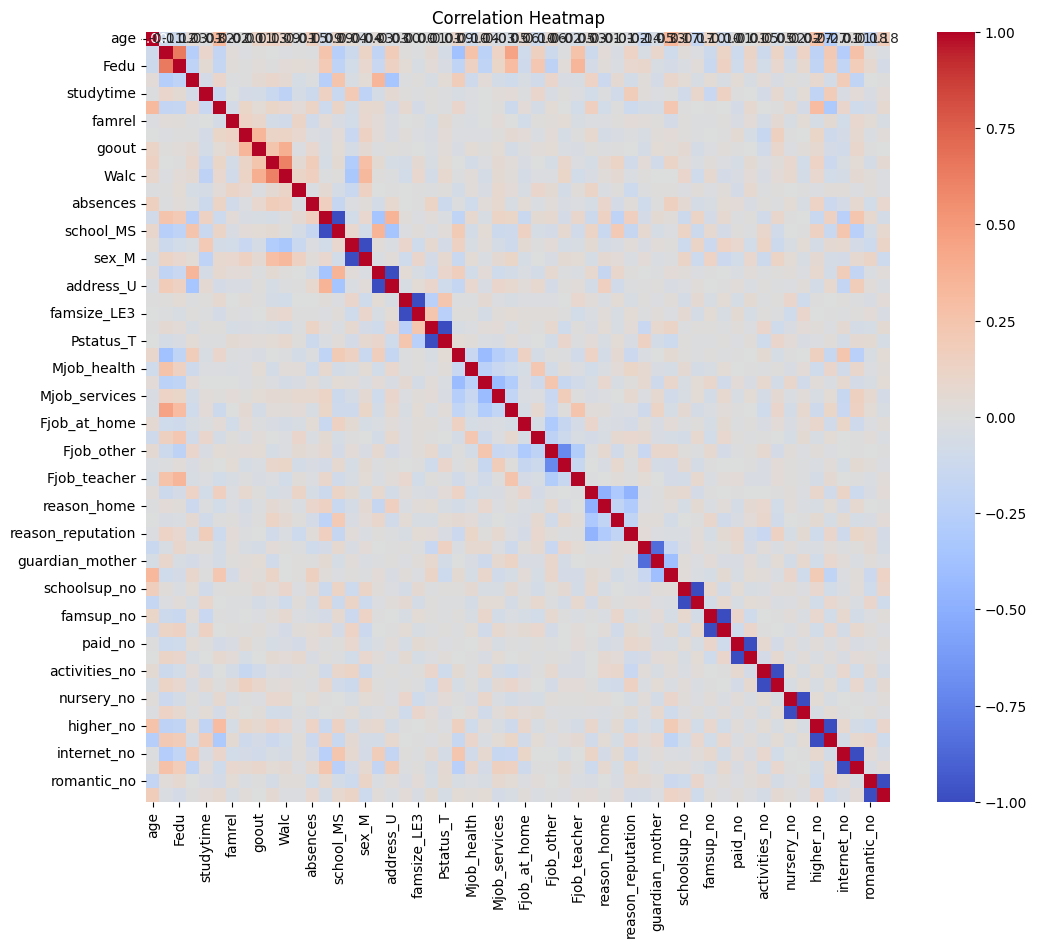

In [11]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import matplotlib.pyplot as plt

# Fetch dataset
student_performance = fetch_ucirepo(id=320)

# Features data
X = student_performance.data.features
y = student_performance.data.target

# Convert features data to DataFrame
df = pd.DataFrame(X)

# Check for columns with string values
columns_with_strings = df.select_dtypes(include=['object']).columns
print("Columns with string values:", columns_with_strings)

# Handle categorical variables: Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                                        'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                                        'nursery', 'higher', 'internet', 'romantic'])

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

In [15]:
# Calculate the correlation between each feature and the target label
correlation_with_target = df_encoded.corrwith(X.iloc[:, -1])

# Get the absolute correlation values
absolute_correlation = correlation_with_target.abs()

# Sort the correlation values in descending order
sorted_correlation = absolute_correlation.sort_values(ascending=False)

# Get the top 5 correlated features
top_correlated_features = sorted_correlation.head(5)

print("Top 5 correlated features with the target label:")
print(top_correlated_features)


Top 5 correlated features with the target label:
absences     1.000000
Dalc         0.172952
school_MS    0.163933
school_GP    0.163933
Walc         0.156373
dtype: float64


## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: Do not forget to put a random_state for reproducibility.*

In [19]:
from sklearn.model_selection import train_test_split

# Map the label column to 0s and 1s
y_mapped = df_encoded.iloc[:, -1].map({'yes': 1, 'no': 0})

# Splitting the data into features and labels
X = df_encoded  # Features
y = y_mapped  # Labels

# Splitting the data into training and test sets (90% for training, 10% for testing)
X_train_cv, X_test, y_train_cv, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Printing the shapes of the resulting datasets
print("Shape of X_train_cv:", X_train_cv.shape)
print("Shape of y_train_cv:", y_train_cv.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train_cv: (584, 56)
Shape of y_train_cv: (584,)
Shape of X_test: (65, 56)
Shape of y_test: (65,)


**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Create a pipeline with StandardScaler and KNN model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler for scaling the features
    ('knn', KNeighborsClassifier())  # KNN model
])

**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [26]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for KNN
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11]  # Various values of k
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Drop rows with missing values from both X_train_cv and y_train_cv
X_train_cv_clean = X_train_cv.dropna()
y_train_cv_clean = y_train_cv[X_train_cv_clean.index]

# Perform the grid search with the cleaned data
grid_search.fit(X_train_cv_clean, y_train_cv_clean)

# Report back the best performing parameters
print("Best parameters:", grid_search.best_params_)

c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py:290: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y contains NaN.

**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

In [ ]:
:-)

### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

# Use the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Predict the labels for the test set
y_pred = best_estimator.predict(X_test)

# Get the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'